<a href="https://colab.research.google.com/github/JennieAurellia/Asleb_SciCom/blob/main/Latihan%20Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Gauss Seidel

In [97]:
def gauss_seidel(x, y, tol=0.022, iter=15):
  x = np.array(x)
  y = np.array(y)

  real_diag = np.array(np.diag(x))
  diag = np.array(np.diag(np.abs(x)))
  np.fill_diagonal(x,0)
  off_diag = np.sum(np.abs(x), axis=1)

  if not np.all(diag > off_diag):
    print('Not diagonally dominant')
    return False

  x = -x
  old = np.zeros(np.size(x[0]))

  for i in range(iter):
    new = np.array(old)

    for idx, row in enumerate(x):
      new[idx] = (y[idx] + np.dot(row, new)) / real_diag[idx]
    print(f'Iteration {i+1} {new}')

    dx = np.sqrt(np.dot(new-old, new-old))

    if dx < tol:
      print('Convergen')
      return

    old = new
  print('Not convergen')
  return

In [98]:
Xs = [
 [
 [4, 2, -1],
 [1, -5, 2],
 [2, -1, -4]
 ],
 [
 [3, 4, 5],
 [-3, 7, -4],
 [1, -4, -2]
 ],
 [
 [9, -2, 3, 2],
 [2, 8, -2, 3],
 [-3, 2, 11, -4],
 [-2, 3, 2, 10]
 ]
]
Ys = [
 [41, -10, 1],
 [34, -32, 62],
 [55, -14, 12, -21]
]

In [99]:
for i, (x,y) in enumerate(zip(Xs, Ys)):
  print(f'A: {x}, y = {y}')
  gauss_seidel(x, y)
  print()

A: [[4, 2, -1], [1, -5, 2], [2, -1, -4]], y = [41, -10, 1]
Iteration 1 [10.25    4.05    3.8625]
Iteration 2 [9.190625   5.383125   2.99953125]
Iteration 3 [8.30832031 4.86147656 2.68879102]
Iteration 4 [8.49145947 4.7738083  2.80227766]
Iteration 5 [8.56366526 4.83364412 2.8234216 ]
Iteration 6 [8.53903334 4.83717531 2.81022284]
Iteration 7 [8.53396806 4.83088275 2.80926334]
Convergen

A: [[3, 4, 5], [-3, 7, -4], [1, -4, -2]], y = [34, -32, 62]
Not diagonally dominant

A: [[9, -2, 3, 2], [2, 8, -2, 3], [-3, 2, 11, -4], [-2, 3, 2, 10]], y = [55, -14, 12, -21]
Iteration 1 [ 6.11111111 -3.27777778  3.35353535 -0.56515152]
Iteration 2 [ 4.39046016 -1.79729938  2.40957938 -1.16463403]
Iteration 3 [ 5.16732568 -2.00269881  2.44080351 -0.95388592]
Iteration 4 [ 5.06444041 -2.04820201  2.49765287 -0.97218189]
Iteration 5 [ 5.03944457 -2.02087972  2.47921505 -0.98169018]
Iteration 6 [ 5.05377509 -2.02550619  2.48050699 -0.97769452]
Convergen



# Least Square Regression

<function matplotlib.pyplot.show(close=None, block=None)>

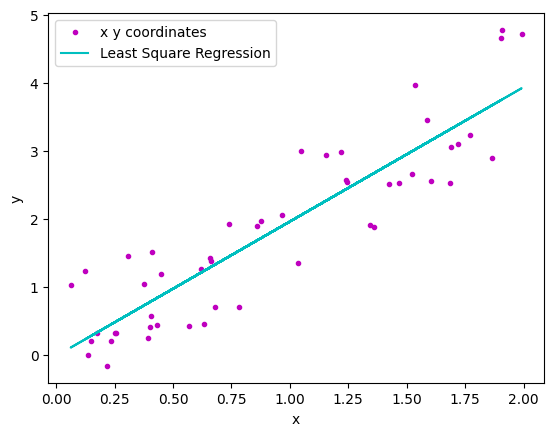

In [101]:
x = [1.3604935458559992, 1.5853985257024064, 0.5679347497479994, 0.21802392874941856, 0.06206493009274472, 1.6038707575944073, 1.5373131133875226, 1.4259588903280196, 0.43245973529077086, 0.257850612191316, 0.8605233835228834, 1.2181914607549382, 1.685409170644646, 0.12380139845637994, 0.13435858737521222, 0.4033370073012925, 0.619722978580614, 1.8628033810771025, 0.40953337540132173, 0.30874442757643994, 1.6891968832960647, 1.4690587356094642, 1.0467612052854245, 1.9070607586182264, 0.3931032996568269, 1.5213063293089268, 0.6792243360513193, 1.0368081016233708, 0.6336032973174668, 0.374905103792015, 1.771763274305583, 1.1559028146600263, 0.17306906153876445, 0.40602786961550885, 1.9021950999201134, 0.7404956567184318, 0.9651727271458386, 1.9916255775351712, 0.2532403679742896, 1.2463066512639314, 1.241263902486962, 1.7213322132140918, 1.3414349017801748, 0.8749630082448829, 0.2365239274541533, 0.6619637276533039, 0.14776060842856809, 0.44702252616842086, 0.7825174342129761, 0.6568730252477795]
y = [1.8860894486952637, 3.4538075220063913, 0.4326122937324488, -0.16109290897894835, 1.0258216227918515, 2.5614347377115334, 3.9711567124023173, 2.5050179041851806, 0.44187536608782496, 0.32763720038740907, 1.8914749598149787, 2.978721894531936, 2.5263464521598777, 1.2309986450932542, -0.0002015887018562701, 0.40845185338253454, 1.261882153097084, 2.890613004730457, 1.5142607191006958, 1.4558182978954157, 3.0535665102311498, 2.5305265858696826, 2.9943005644276735, 4.775595583754577, 0.2511451686187445, 2.662286088591588, 0.7013711036412655, 1.3574878178829441, 0.45879261586108844, 1.041383576988614, 3.2345537741888895, 2.9442588452869383, 0.32481178798514976, 0.5676922986388366, 4.6507103639541985, 1.9206250787747186, 2.0631617694637643, 4.718498033969695, 0.328918880734296, 2.5468066110409096, 2.56571088586923, 3.1028383540315225, 1.916718978555218, 1.9674896037631926, 0.20908513317900246, 1.3752289600324012, 0.21057773380247213, 1.1962232390302614, 0.7068252906124675, 1.428520921524234]

x = np.array(x)
y = np.array(y)

X = np.vstack([x, np.ones(len(x))]).T
alpha = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

plt.plot(x, y, '.m')
plt. plot(x, alpha[0]*x + alpha[1], 'c')
plt.legend(["x y coordinates", "Least Square Regression"])
plt.xlabel("x")
plt.ylabel("y")
plt.show

# Reimann Integral

In [78]:
def f(x):
  return 4*x**4 + 2*x**3 - 6*x

def g(x):
  return (np.sin(x))**2 + np.sin(x) + 2

In [79]:
a = -3
b = 3
n = 30
lebar_kotak = (b-a)/(n-1)
x = np.linspace(a, b, n)
y = f(x)

In [80]:
left_reimann = lebar_kotak * sum(y[:n-1])
print(left_reimann)

384.4323034267851


In [81]:
right_reimann = lebar_kotak * sum(y[1:])
print(right_reimann)

399.328855150923


In [82]:
x_mid = (x[:n-1] + x[:1]) / 2
y_mid = f(x_mid)

midpoint = lebar_kotak * sum(y_mid)
print(midpoint)

392.267209213877


In [83]:
A = -np.pi
B = 2*np.pi
N = 27
lebar_kotak = (B-A)/(N-1)
X = np.linspace(A, B, N)
Y = g(x)

In [84]:
sisi_sejajar = Y[0] + 2*sum(Y[1:n-1]) + Y[n-1]

trapezoid = lebar_kotak * sisi_sejajar / 2
print(trapezoid)

26.521902084952746


# Newton Raphson

In [85]:
def f(x):
  return x**6 + 2*x**2 - 3
def g(x):
  return 6*x**5 + 4*x

In [94]:
def newton_raphson(x0, tol=0.01, iter=15):
  for i in range(iter):
    x1 = x0 - (f(x0) / g(x0))

    if(np.abs(f(x1)) < tol):
      print(f'The root of equation is {x1}')
      return

    print(f'Iteration of {i+1}. new root = {x1}')
    x0 = x1

In [95]:
newton_raphson(4)

Iteration of 1. new root = 3.330357142857143
Iteration of 2. new root = 2.7705278067251076
Iteration of 3. new root = 2.3014692834655897
Iteration of 4. new root = 1.9076486911265778
Iteration of 5. new root = 1.5780738506315775
Iteration of 6. new root = 1.3101344278134677
Iteration of 7. new root = 1.1168277838634215
Iteration of 8. new root = 1.0204619280744585
The root of equation is 1.0006965918207418
